In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
import labwork

In [26]:
ne_phi = np.array([
    2940,
    2920,
    2852,
    2838,
    2813,
    2792,
    2780,
    2742,
    2734,
    2714,
    2702,
    2688,
    2668,
    2646,
    2636,
    2620,
    2607,
    2589,
    2564,
    2547,
    2519,
    2501,
    2238,
    2204,
    2196,
])

ne_lambda = np.array([
    7032,
    6929,
    6717,
    6678,
    6599,
    6533,
    6507,
    6402,
    6383,
    6334,
    6305,
    6267,
    6217,
    6164,
    6143,
    6096,
    6074,
    6030,
    5976,
    5945,
    5882,
    5852,
    5401,
    5341,
    5331
])

hg_phi = np.array([
    2914,
    2678,
    2471,
    2460,
    2284,
    1859,
    1198,
    644,
])

hg_lambda = np.array([
    6907,
    6234,
    5791,
    5770,
    5461,
    4916,
    4358,
    4047
])

h1_phi = np.array([
    2444,
    1455,
    812
]) + 360

h2_phi = np.array([
    2804,
    1824,
    1187,
    773
])

delta_phi = 4

_____
Подгон (предсказываем по данным h2_phi с чужой устнановки четвёртое значение в h1_phi - на нашей установке)

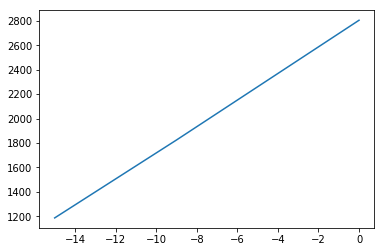

In [27]:
plt.plot(h1_phi - h2_phi[:3], h2_phi[:3]) 
plt.show()  

Типа линия, типа прямая

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR = LinearRegression() 
LR.fit(h2_phi[:3].reshape(3, 1), (h1_phi - h2_phi[:3]).reshape(3, 1))
h1_phi_4_predicted_delta = LR.predict([[h2_phi[3]]])
h1_phi_4_predicted = h2_phi[3] + h1_phi_4_predicted_delta
h1_phi_4_predicted  # приблизили разность оптимальной кривой, спрогнозировали

array([[754.19898575]])

In [30]:
h1_phi_new = np.array(list(h1_phi) + [h1_phi_4_predicted])
h1_phi_new

array([2804.        , 1815.        , 1172.        ,  754.19898575])

________________________

In [31]:
len(ne_phi), len(ne_lambda)

(25, 25)

In [32]:
len(hg_phi), len(hg_lambda)

(8, 8)

In [33]:
X = np.hstack([ne_phi, hg_phi])
y = np.hstack([ne_lambda, hg_lambda])
f = interp1d(X, y, kind='quadratic')

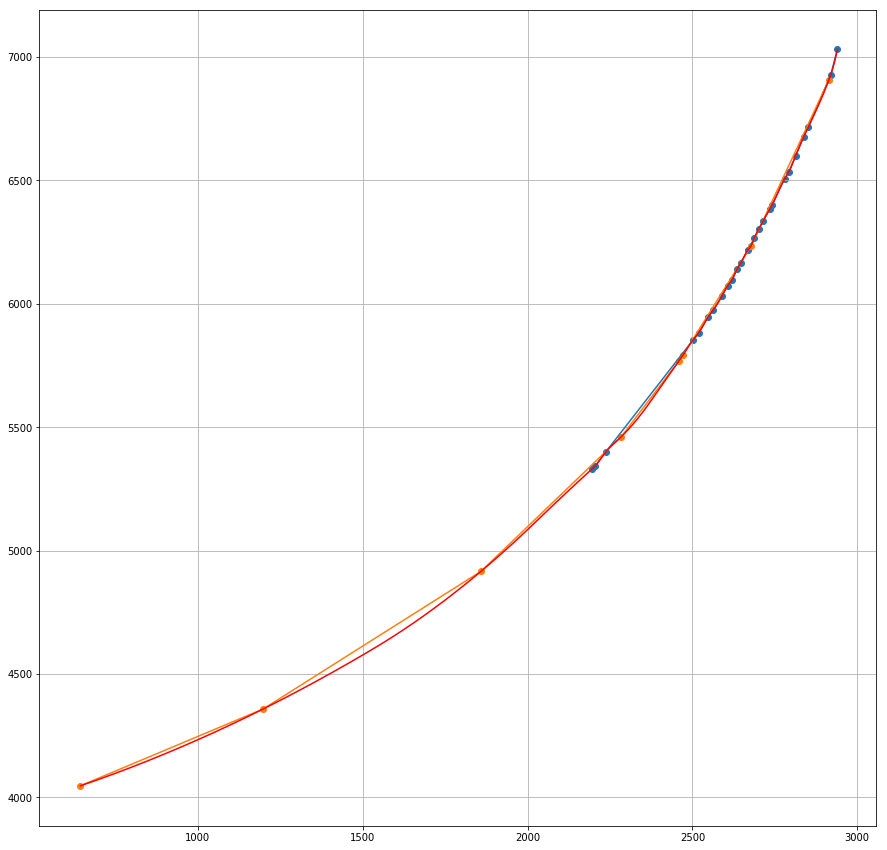

In [34]:
plt.figure(figsize=(15, 15))
plt.plot(ne_phi, ne_lambda)
plt.scatter(ne_phi, ne_lambda)

plt.plot(hg_phi, hg_lambda)
plt.scatter(hg_phi, hg_lambda)

#plt.plot(h1_phi, h1_lambda)
#plt.scatter(h1_phi, h1_lambda)

grid = np.linspace(X.min(), X.max(), 1000)
plt.plot(grid, f(grid), color="red")

plt.grid()
plt.show()

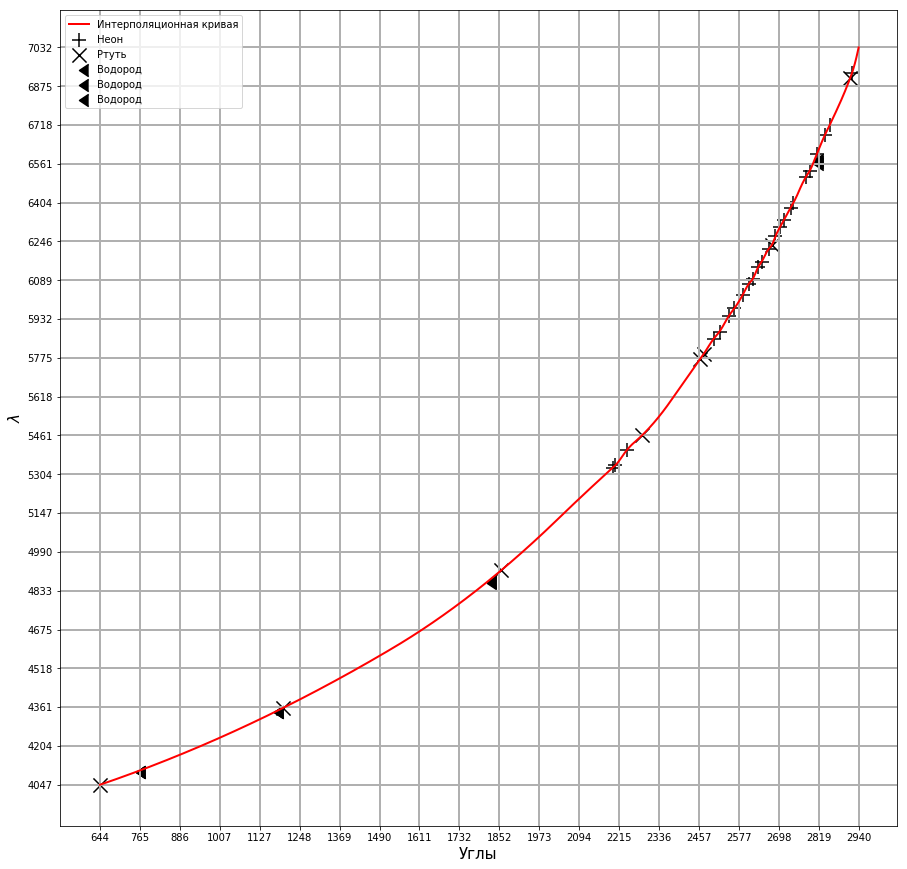

In [35]:
plt.figure(figsize=(15, 15))
plt.scatter(ne_phi, ne_lambda, marker="+", s=200, label="Неон", color="black")
plt.scatter(hg_phi, hg_lambda, marker="x", s=200, label="Ртуть", color="black")
plt.scatter(h1_phi_new, f(h1_phi_new), marker=4, s=150, label="Водород", color="black")
plt.scatter(h1_phi_new, f(h1_phi_new+2), marker=4, s=150, label="Водород", color="black")
plt.scatter(h1_phi_new, f(h1_phi_new-2), marker=4, s=150, label="Водород", color="black")
grid = np.linspace(X.min(), X.max(), 1000)
plt.plot(grid, f(grid), color="red", label="Интерполяционная кривая", lw=2)
plt.xlabel("Углы", fontsize=15)
plt.ylabel("$\lambda$", fontsize=15)
plt.legend()

xticklocs =  np.linspace(X.min(), X.max(), 20)
yticklocs =  np.linspace(y.min(), y.max(), 20)

plt.xticks(xticklocs)
plt.yticks(yticklocs)
plt.grid(lw=2)
plt.savefig(fname="2.2_Hydrogen_Spectre.pdf", dpi=900, format="pdf", papertype="a4")
plt.savefig(fname="2.2_Hydrogen_Spectre.png", format="png")
plt.show()

In [36]:
h_lambda_predicted_lo = f(h1_phi_new - delta_phi)  # интервал для погрешностей 
h_lambda_predicted_hi = f(h1_phi_new + delta_phi)
h_lambda_predicted = (h_lambda_predicted_lo + h_lambda_predicted_hi) / 2
for i in range(4):
    error = (h_lambda_predicted_hi[i] - h_lambda_predicted_lo[i]) / 2
    print("h_lambda_{} = ".format(i+3), labwork.sciRoundD(h_lambda_predicted[i],
                      error,
                      "Ангстрем"
                      ))
    """labwork.sciPrintD(h_lambda_predicted[i],
                      error,
                      "h_lambda_{} = ".format(i+3))"""
    h_lambda_predicted, (h_lambda_predicted_hi - h_lambda_predicted_lo) / 2

h_lambda_3 =  6569 ± 13 [Ангстрем] (0.2%)
h_lambda_4 =  4867 ± 4 [Ангстрем] (0.09%)
h_lambda_5 =  4341 ± 3 [Ангстрем] (0.06%)
h_lambda_6 =  4100 ± 2 [Ангстрем] (0.05%)


<img src="http://mypresentation.ru/documents/637d3b7041847466abfc8a4779050bdc/img17.jpg">

$$\frac{1}{\lambda} = R Z^2 (\frac{1}{n^2} - \frac{1}{m^2})$$

$$R = \frac{(nm)^2}{\lambda Z^2 (m^2 - n^2)}$$

In [17]:
n =  2
R = np.array([((n*m)**2) / (h_lambda_predicted[m-3] * (m*m - n*n))for m in range(3, 7)])

In [18]:
R  # теория: R = 109 677,6 см ^ (-1)

array([0.00109607, 0.00109571, 0.00109701, 0.00109768])

In [19]:
R.mean() # длины волн были в ангстремах -> нужно умножить на 10^10

0.0010966181474160357

In [20]:
R.mean() * 10 ** 10  # это в м ^ (-1)

10966181.474160356

In [21]:
R_predicted = R.mean() * 10 ** 8  # это в cм ^ (-1)
R_predicted

109661.81474160356

In [37]:
R  * 10 ** 8 # теория: R = 109 677,6 см ^ (-1)

array([109607.420785  , 109570.61802973, 109701.26711681, 109767.95303488])

In [22]:
labwork.sciPrintR(R_predicted , R.std(ddof=1) / (4)**0.5 / R.mean(), "R = ")  # с погрешностью

R =  109661.81474160356 +- 44.81198684537257 ( 0.0408638019997783 %)


In [24]:
print("R = ", labwork.sciRoundR(R_predicted , R.std(ddof=1) / (4)**0.5 / R.mean(), "см ^ (-1) "))

R =  109660 ± 40 [см ^ (-1) ] (0.04%)


In [38]:
R_theory = 109677.6
(R_theory - R_predicted) / R_theory  # отличие от теории, доля

0.00014392417773949603